In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ranksums
import matplotlib.pyplot as plt

from ..util.util import 

sns.set(style="whitegrid")

In [147]:
%matplotlib inline

In [148]:
dfpath = "../output/dataframes/correlations_subj1_no_sig_mask.csv"

In [149]:
df = pd.read_csv(dfpath)

In [150]:
print(df.columns)

Index(['Unnamed: 0', 'ecc_rois', 'place_rois', 'visual_rois',
       'vanishing_point', 'edge2d', 'edge3d', 'room_layout', 'class_places'],
      dtype='object')


In [153]:
tasks = df.columns[4:]
print(tasks)

Index(['vanishing_point', 'edge2d', 'edge3d', 'room_layout', 'class_places'], dtype='object')


TypeError: can only concatenate str (not "int") to str

<Figure size 432x288 with 0 Axes>

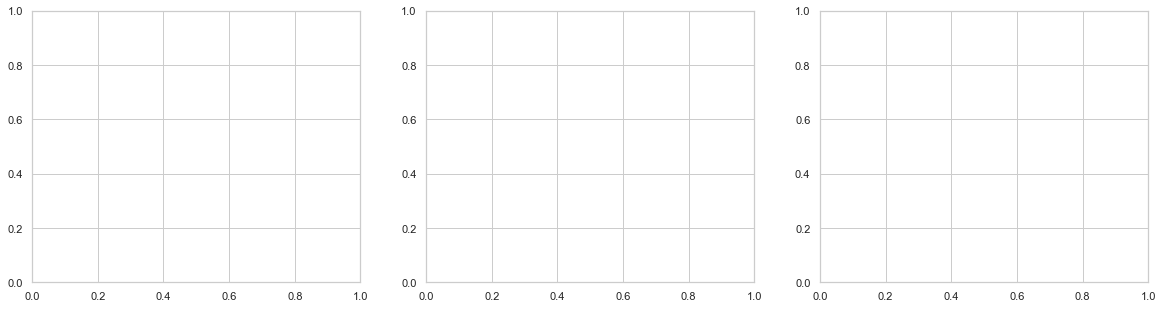

In [154]:
plt.figure()
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20,5))
for i, task in enumerate(tasks[1:-1]):
    dist_diffs = list()
    visual_areas = np.arange(np.min(df.visual_rois),np.max(df.visual_rois)+1)
    for vnum in visual_areas:
        rs = ranksums(df.vanishing_point[df.visual_rois == vnum], df[task][df.visual_rois == vnum])
        print(rs)
        dist_diffs.append(rs[0])
    sns.lineplot(x=visual_areas, y=dist_diffs, ax=axes.flat[i])
    axes.flat[i].set_xlabel("Visual ROIS")
    axes.flat[i].set_ylabel("Ranksum")
    axes.flat[i].set_title(str(task))

edge2d
RanksumsResult(statistic=-10.57498710348178, pvalue=3.8923104643031656e-26)
RanksumsResult(statistic=-316.8701171097685, pvalue=0.0)
RanksumsResult(statistic=-60.51865414130763, pvalue=0.0)
RanksumsResult(statistic=-52.982378147619954, pvalue=0.0)
RanksumsResult(statistic=-73.68544534537266, pvalue=0.0)
RanksumsResult(statistic=-69.2238888023078, pvalue=0.0)
RanksumsResult(statistic=-86.63244487058495, pvalue=0.0)
room_layout
RanksumsResult(statistic=-10.281780437026647, pvalue=8.514006001393931e-25)
RanksumsResult(statistic=-498.1890915716685, pvalue=0.0)
RanksumsResult(statistic=-57.699966790826764, pvalue=0.0)
RanksumsResult(statistic=-51.1774454405932, pvalue=0.0)
RanksumsResult(statistic=-71.48824681669214, pvalue=0.0)
RanksumsResult(statistic=-67.46294536615996, pvalue=0.0)
RanksumsResult(statistic=-88.18377437020209, pvalue=0.0)
class_places
RanksumsResult(statistic=-11.845549324787354, pvalue=2.269265053490284e-32)
RanksumsResult(statistic=-684.9287000123079, pvalue=0.0)

<Figure size 432x288 with 0 Axes>

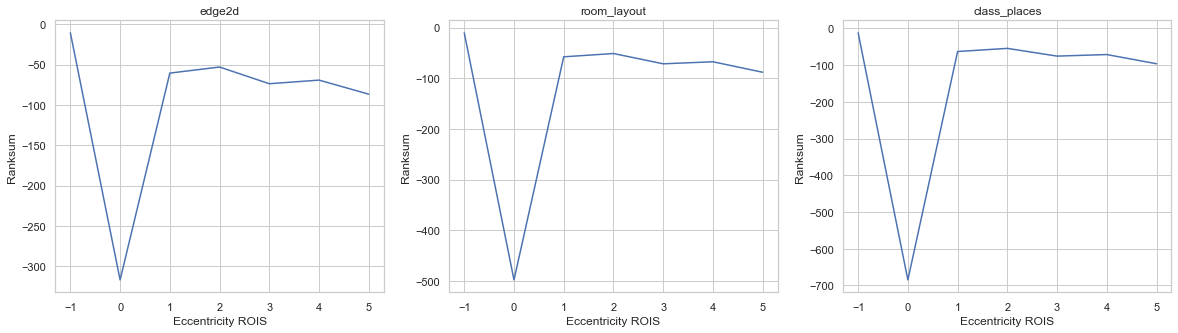

In [116]:
plt.figure()
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20,5))
for i, task in enumerate(tasks[1:-1]):
    print(task)
    dist_diffs = list()
    visual_areas = np.arange(np.min(df.ecc_rois),np.max(df.ecc_rois)+1)
    for vnum in visual_areas:
        rs = ranksums(df.vanishing_point[df.ecc_rois == vnum], df[task][df.ecc_rois == vnum])
        print(rs)
        dist_diffs.append(rs[0])
    sns.lineplot(x=visual_areas, y=dist_diffs, ax=axes.flat[i])
    axes.flat[i].set_xlabel("Eccentricity ROIS")
    axes.flat[i].set_ylabel("Ranksum")
    axes.flat[i].set_title(str(task))
    


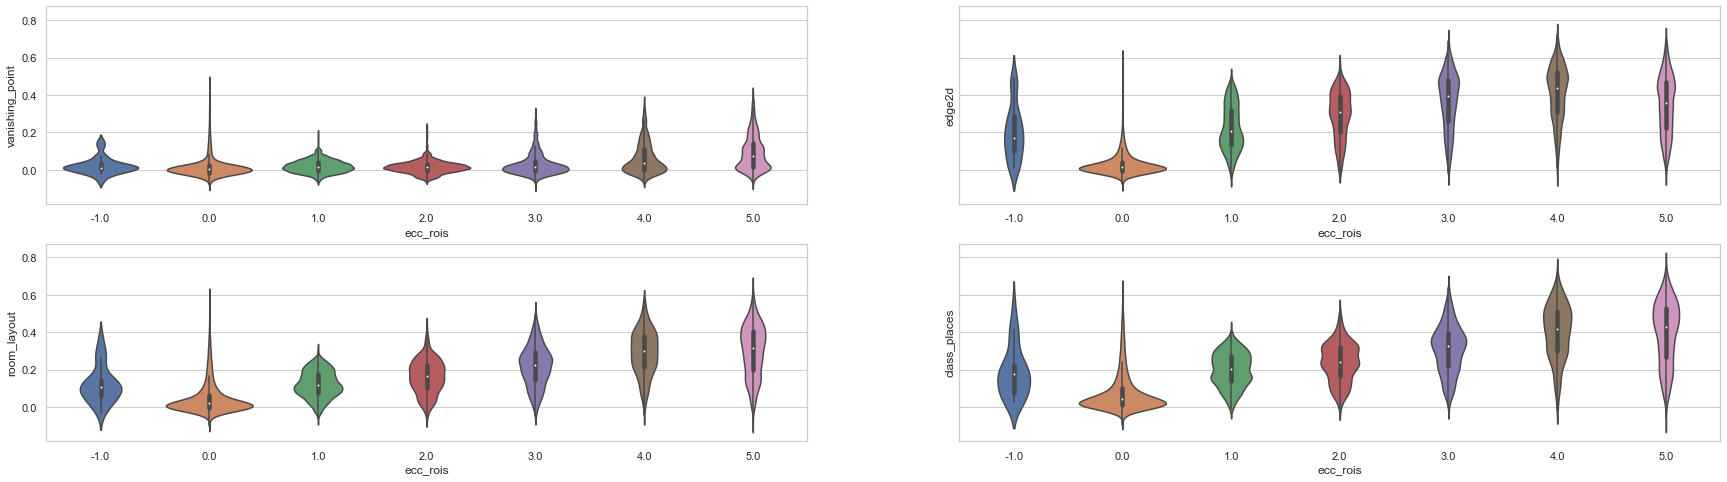

In [129]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(30,8),sharey=True)
for i, ax in enumerate(axes.flat):
    sns.violinplot(x=df["ecc_rois"], y=df[tasks[i]], ax=ax)

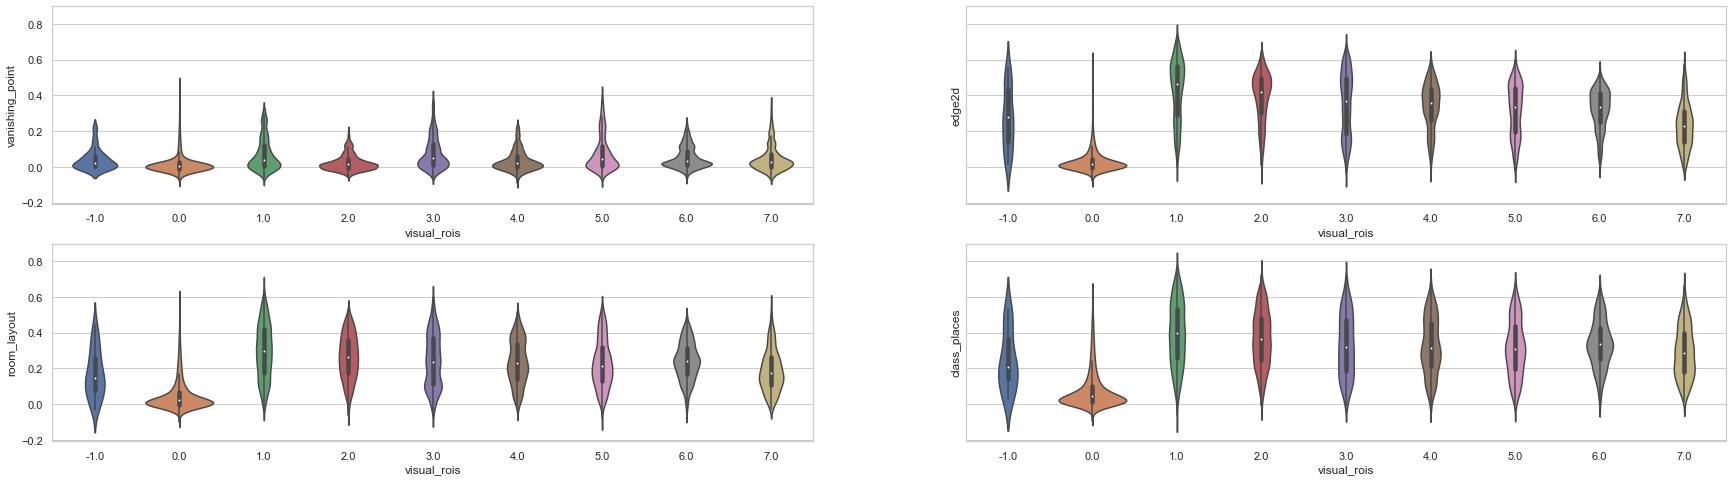

In [127]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(30,8), sharey=True)
for i, ax in enumerate(axes.flat):
    sns.violinplot(x=df["visual_rois"], y=df[tasks[i]], ax=ax)

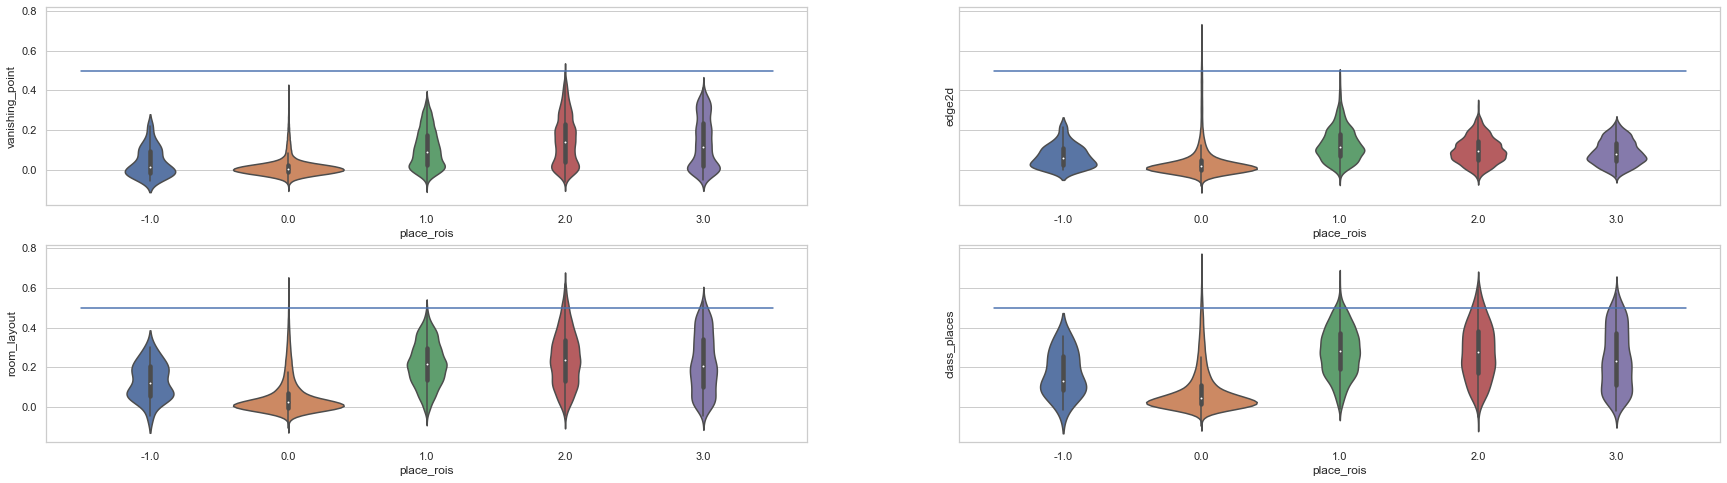

In [139]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(30,8), sharey=True)
for i, ax in enumerate(axes.flat):
    sns.violinplot(x=df["place_rois"], y=df[tasks[i]], ax=ax)
    sns.lineplot(x=(-0.5,4.5),  y=0.5, ax=ax)

# Ranksum of predictions

In [135]:
rs = np.load("../output/comparisons/ranksums_of_pred_of_edge3d_and_class_places_subj1.npy")

In [136]:
rs.shape

(107104,)